# SVC (метод опорных векторов)

SVC (Support Vector Classification) –метод классификации, основанный на определении положения оптимальной разделяющей гиперплоскости, максимизирующейсумму расстояний от нее до ближайших к ней элементов выборки.  

# PCA (Principal Component Analysis) 

PCA –метод главных компонент –применяется для снижения размерности пространства признаков. Идея метода состоит в том, что зачастую исходные признаки сильно коррелируют между собой, и поэтому используемый алгоритм классификации занимается восстановлением тривиальных линейных зависимостей между признаками.Поэтому можно ввести новые оси координат, направленные вдоль направлений наибольшего разброса значений исходного набора данных, и спроецировать данные на новые оси.

Можно показать, что направления наибольшего разброса значений набора данных совпадают с направлениями собственных векторов ковариационной матрицы, которым соответствуют наибольшие по модулю собственные значения.

Ковариационная матрица K-это матрица, у которой каждый элемент $K_{ij}$ является корреляцией между соответствующими признаками $X_i$,$X_j$.Если собственные значения матрицы Kсильно отличаются (на порядки), то имеет смысл использовать PCA.

# PCA+SVC для Iris 

Строим матрицу корреляцийпризнаков набора Iris. Видно, что многие элементы вне главной диагонали близки по модулю к 1, что говорит о сильной коррелированности соответствующих пар признаков.

In [1]:
import pandas as pd

In [2]:
data = pd.read_csv('data/train.csv')

In [3]:
data


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Преобразование тренировочных данных


In [4]:
nan_values = data.isna()
nan_columns = nan_values.any()
columns_with_nan = data.columns[nan_columns]#все столбцы которые имею пусыте значения
columns_with_nan
for i in columns_with_nan:
    print(i, data[i].isna().sum())

LotFrontage 259
Alley 1369
MasVnrType 8
MasVnrArea 8
BsmtQual 37
BsmtCond 37
BsmtExposure 38
BsmtFinType1 37
BsmtFinType2 38
Electrical 1
FireplaceQu 690
GarageType 81
GarageYrBlt 81
GarageFinish 81
GarageQual 81
GarageCond 81
PoolQC 1453
Fence 1179
MiscFeature 1406


In [5]:
drop_col = ['Alley','PoolQC','Fence','MiscFeature']

In [6]:
data = data.drop(drop_col,axis = 1)

In [7]:
#заполняем пустые значения чем-то,зависит от столбца
data['LotFrontage'].fillna(data['LotFrontage'].mean(), inplace=True)
data[['MasVnrType']].fillna('None', inplace=True)
data.dropna(subset=['GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond'], inplace=True)#удаляем там где нет ничего про камин
data.dropna(subset=['BsmtQual', 'BsmtCond', 'BsmtFinType1'], inplace=True)#также про подвал
data.dropna(subset=['MasVnrType', 'MasVnrArea'], inplace=True)#также про облицовку
data['FireplaceQu'].fillna('NA', inplace=True)#качесвто камина NA- нет камина
data['BsmtExposure'].fillna('No', inplace=True)#тут что-то про стены сада: No-нет воздействия
data['BsmtFinType2'].fillna('NA', inplace=True)#состояние подвала:NA-нет подвала
data['Electrical'].fillna('SBrkr', inplace=True)#электрическая система:SBrkr- стандартная система
data.columns[data.isna().any()]


/usr/local/lib/python3.7/site-packages/pandas/core/frame.py:4259: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  **kwargs


Index([], dtype='object')

In [8]:
train_data = pd.get_dummies(data)
train_data.dtypes
train_data

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


# Преобразование данных для теста


In [9]:
test_data = pd.read_csv('data/test.csv')

In [10]:
test_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [11]:
nan_values = test_data.isna()
nan_columns = nan_values.any()
columns_with_nan = test_data.columns[nan_columns]#все столбцы которые имею пусыте значения
columns_with_nan
for i in columns_with_nan:
    print(i, test_data[i].isna().sum())

MSZoning 4
LotFrontage 227
Alley 1352
Utilities 2
Exterior1st 1
Exterior2nd 1
MasVnrType 16
MasVnrArea 15
BsmtQual 44
BsmtCond 45
BsmtExposure 44
BsmtFinType1 42
BsmtFinSF1 1
BsmtFinType2 42
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
KitchenQual 1
Functional 2
FireplaceQu 730
GarageType 76
GarageYrBlt 78
GarageFinish 78
GarageCars 1
GarageArea 1
GarageQual 78
GarageCond 78
PoolQC 1456
Fence 1169
MiscFeature 1408
SaleType 1


In [12]:
test_data = test_data.drop(drop_col,axis = 1)
test_data.fillna(method='ffill', inplace=True)
test_data.fillna(method='bfill', inplace=True)
test_data.columns[test_data.isna().any()]

Index([], dtype='object')

In [13]:
# a['int_Rating'] = a['Rating'].apply(lambda s: round(s))

# del a['Rating']
# a.head()


In [14]:
from sklearn.decomposition import PCA
from sklearn.covariance import empirical_covariance
from numpy.linalg import eigvals

In [15]:
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [16]:
# X = a.loc[:, :'Broad Bean\nOrigin_West Africa']
# y = a[['int_Rating']]
y = train_data['SalePrice']
X = train_data.drop(['SalePrice'], axis=1)
#X = data[['Company \n(Maker-if known)', 'Specific Bean Origin\nor Bar Name', 'REF', 'Review\nDate', 'Cocoa\nPercent', 'Company\nLocation', 'Bean\nType', 'Broad Bean\nOrigin']]

In [17]:
# разделяем выборку на обучающую и тестовую в соотношениии 70% / 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [18]:
# Инициализируем классификатор и обучаем его на полученной выборке 
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [19]:
# Запускаем предсказание на тестовой выборке, чтобы сравнить
# полученные результаты с известными значениями целевого атрибута 
prediction = classifier.predict(X_test)


In [20]:
# Выведем бок-о-бок известные (ground truth) и предсказанные (prediction) значения
pd.DataFrame({'ground truth': y_test, 'prediction': prediction})

,ground truth,prediction
877,350000,446261
273,139000,178000
757,158900,166000
1240,224900,216000
339,155000,136000
...,...,...
352,95000,83000
1015,227000,287000
147,222500,250000
708,179540,163990


In [21]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, prediction))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [22]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

       58500       0.00      0.00      0.00         0
       60000       0.00      0.00      0.00         1
       62383       0.00      0.00      0.00         1
       66500       0.00      0.00      0.00         0
       67000       0.00      0.00      0.00         0
       68400       0.00      0.00      0.00         1
       68500       0.00      0.00      0.00         0
       73000       0.00      0.00      0.00         1
       76000       0.00      0.00      0.00         1
       78000       0.00      0.00      0.00         1
       80000       0.00      0.00      0.00         3
       82500       0.00      0.00      0.00         1
       83000       0.00      0.00      0.00         1
       83500       0.00      0.00      0.00         0
       85000       0.00      0.00      0.00         1
       85400       0.00      0.00      0.00         1
       86000       0.00      0.00      0.00         1
       87000       0.00    

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


svc


In [23]:
import numpy as np
import seaborn as sns
from sklearn import svm

In [24]:
clf = svm.SVC(gamma ='auto')
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [25]:
prediction = clf.predict(X_test)

In [26]:
pd.DataFrame({'truth': y_test, 'prediction': prediction})

,truth,prediction
877,350000,140000
273,139000,140000
757,158900,140000
1240,224900,140000
339,155000,140000
...,...,...
352,95000,140000
1015,227000,140000
147,222500,140000
708,179540,140000


In [27]:
print(confusion_matrix(y_test, prediction))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [28]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

       60000       0.00      0.00      0.00         1
       62383       0.00      0.00      0.00         1
       68400       0.00      0.00      0.00         1
       73000       0.00      0.00      0.00         1
       76000       0.00      0.00      0.00         1
       78000       0.00      0.00      0.00         1
       80000       0.00      0.00      0.00         3
       82500       0.00      0.00      0.00         1
       83000       0.00      0.00      0.00         1
       85000       0.00      0.00      0.00         1
       85400       0.00      0.00      0.00         1
       86000       0.00      0.00      0.00         1
       88000       0.00      0.00      0.00         1
       90350       0.00      0.00      0.00         1
       93000       0.00      0.00      0.00         1
       94500       0.00      0.00      0.00         1
       94750       0.00      0.00      0.00         1
       95000       0.00    

/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


pca

In [29]:
from sklearn.decomposition import PCA
from sklearn.covariance import empirical_covariance
from numpy.linalg import eigvals

In [30]:
X.corr

<bound method DataFrame.corr of         Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  SaleType_ConLw  \
0

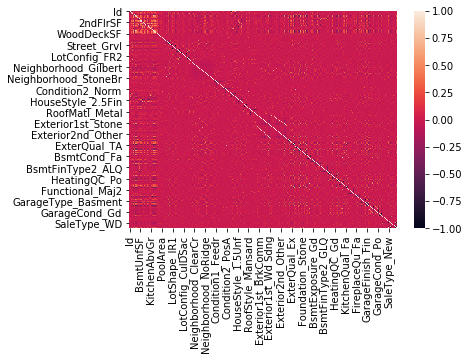

In [31]:
sns.heatmap(X.corr())

In [32]:
empirical_covariance(X)

array([[ 1.77834840e+05,  3.13042089e+02, -1.28027176e+02, ...,
         2.43431366e-01,  3.44834817e+00, -2.91301359e+00],
       [ 3.13042089e+02,  1.69810844e+03, -3.26944851e+02, ...,
         1.67076224e-02,  6.48294121e-01, -6.52923542e-01],
       [-1.28027176e+02, -3.26944851e+02,  4.89852317e+02, ...,
         3.52949242e-02, -7.33480174e-01,  7.92269514e-01],
       ...,
       [ 2.43431366e-01,  1.67076224e-02,  3.52949242e-02, ...,
         1.46918085e-02, -1.23117577e-02, -1.33460788e-03],
       [ 3.44834817e+00,  6.48294121e-01, -7.33480174e-01, ...,
        -1.23117577e-02,  1.44047565e-01, -7.38705464e-02],
       [-2.91301359e+00, -6.52923542e-01,  7.92269514e-01, ...,
        -1.33460788e-03, -7.38705464e-02,  8.14778113e-02]])

In [33]:
eigvals(empirical_covariance(X))

array([ 1.06590459e+08+0.00000000e+00j,  4.77159687e+05+0.00000000e+00j,
        3.51352723e+05+0.00000000e+00j,  2.89519816e+05+0.00000000e+00j,
        2.55952658e+05+0.00000000e+00j,  1.77834466e+05+0.00000000e+00j,
        4.37404153e+04+0.00000000e+00j,  2.76618941e+04+0.00000000e+00j,
        2.20644487e+04+0.00000000e+00j,  2.08749028e+04+0.00000000e+00j,
        1.46464501e+04+0.00000000e+00j,  4.14139533e+03+0.00000000e+00j,
        3.30617674e+03+0.00000000e+00j,  3.07121520e+03+0.00000000e+00j,
        2.13626171e+03+0.00000000e+00j,  1.60859144e+03+0.00000000e+00j,
        1.50323727e+03+0.00000000e+00j,  8.97386315e+02+0.00000000e+00j,
        7.88546276e+02+0.00000000e+00j,  3.07481773e+02+0.00000000e+00j,
        1.86997215e+02+0.00000000e+00j,  9.91030278e+01+0.00000000e+00j,
        7.24179240e+00+0.00000000e+00j,  1.70690092e+00+0.00000000e+00j,
        9.80252068e-01+0.00000000e+00j,  8.52661044e-01+0.00000000e+00j,
        8.02004996e-01+0.00000000e+00j,  5.63069163

In [35]:
pca.explained_variance_ratio_

NameError: name 'pca' is not defined

pca + svc


In [36]:
X_reduced = PCA(n_components = 2).fit_transform(X)

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=3)

In [38]:
clf = svm.SVC()
clf.fit(X_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [39]:
prediction = clf.predict(X_test)

In [40]:
pd.Dataframe({'truth': y_test, 'prediction': prediction})

AttributeError: module 'pandas' has no attribute 'Dataframe'

In [41]:
print(confusion_matrix(y_test, prediction))

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
